<a href="https://colab.research.google.com/github/jesanchez121/Metodos1_JuanEstebanSanchez/blob/main/tarea_integracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [312]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

3. (Theoretical) Hacer los pasos intermedios para encontrar la regla de Simpson simple,
Ecuacion (4.109).

$f(x) ≈ p_{2}(x) = \frac{(x − b)(x − x_{m})}
{(a − b)(a − x_{m})}
f(a)+ \frac{(x − a)(x − b)}
{(x_{m} − a)(x_{m} − b)}
f(x_{m}) + \frac{(x − a)(x − x_{m})}
{(b − a)(b − x_{m})}f(b), ∀x ∈ [a, b].$



$\int_a^{b} \ p_{2}(x) \ \mathrm{d}x \ = \int_a^{b} \left( \frac{(x − b)(x − x_{m})}
{(a − b)(a − x_{m})}
f(a)+ \frac{(x − a)(x − b)}
{(x_{m} − a)(x_{m} − b)}
f(x_{m}) + \frac{(x − a)(x − x_{m})}
{(b − a)(b − x_{m})}f(b) \right) $

$=$


$\frac{f(a)}{(a − b)(a − x_{m})} \int_a^{b} (x − b)(x − x_{m}) + \frac{f(x_{m})}{(x_{m} − a)(x_{m} - b)} \int_a^{b} (x − a)(x − b) + \frac{f(b)}{(b − a)(b − x_{m})} \int_a^{b} (x − a)(x − x_{m}) $

$=$


$\frac{f(a)}{(a − b)(a − x_{m})} \int_a^{b} \left( x^2 − x(x_{m}+b)+bx_{m} \right) + \frac{f(x_{m})}{(x_{m} − a)(x_{m} - b)} \int_a^{b} \left( x^2 − x(a+b)+ab \right) + \frac{f(b)}{(b − a)(b − x_{m})} \int_a^{b} \left( x^2 − x(x_{m}+a)+ax_{m} \right) $

$=$


$\frac{f(a)}{(a − b)(a − x_{m})} \left. \left( \frac{x^3}{3} − \frac{x^2}{2}(x_{m}+b)+xbx_{m} \right)\right|_a^b   + \frac{f(x_{m})}{(x_{m} − a)(x_{m} - b)} \left. \left( \frac{x^3}{3} − \frac{x^2}{2}(a+b)+xab \right) \right|_a^b  + \frac{f(b)}{(b − a)(b − x_{m})} \left. \left( \frac{x^3}{3} − \frac{x^2}{2}(x_{m}+a)+xax_{m} \right) \right|_a^b $

$=$

$\frac{f(a)}{(a − b)(a − x_{m})} \left( \frac{b^3-a^3}{3} − \frac{b^2-a^2}{2}(x_{m}+b)+ (b^2x_{m}-abx_{m}) \right) + \frac{f(x_{m})}{(x_{m} − a)(x_{m} - b)}  \left( \frac{b^3-a^3}{3} − \frac{b^2-a^2}{2}(a+b)+(ab^2-a^2b) \right)  + \frac{f(b)}{(b − a)(b − x_{m})} \left( \frac{b^3-a^3}{3} − \frac{b^2-a^2}{2}(x_{m}+a)+(bax_{m}-a^2x_{m}) \right) $

ahora con $x_{m} = \frac{a+b}{2}$ y $h=\frac{b-a}{2}$ el resultado de la integral es:




$\int_a^{b} f(x) ≈ \int_a^{b}  p_{2}(x) = \frac{h}{3}(f(a) + 4f(x_{m}) + f(b)).$

5. Resolver la siguiente integral con el metodo del trapecio:

$\int_0^{1} e^{-x^2}dx $

usando la condicion que el error debe ser menor a 0.005 en el calculo (si el numero de
puntos (n) es decimal tomar el mayor entero).

In [313]:
def metodo_trapecio_compuesto(f, a, b, E):
    x = sp.Symbol('x')
    d2=sp.diff(f(x),x,2)
    d3=sp.diff(f(x),x,3)
    critical_points = sp.solve(d3, x)
    real_roots = [root.evalf() for root in critical_points if root.is_real]
    real_roots.extend([a, b])
    mx = max([abs(d2.subs(x, p)) for p in real_roots if d2.subs(x, p) != sp.nan])
    n=sp.sqrt((((b-a)**3)/(12*E))*mx)
    n=sp.ceiling(n)
    n=int(n)
    h=(b-a)/n
    sum=(h/2)*(f(a)+f(b))
    for i in range(1,n):
        sum+=h*f(a+i*h)
    return sum


In [314]:
f2 = lambda x: sp.exp(-x**2)

sp.N(metodo_trapecio_compuesto(f2, 0, 1, 0.005))

0.745119412436179

6. Para encontrar la inductancia exacta de una bobina toroidal es necesario calcular la integral:

$\int_{-a}^{a} \frac{\sqrt{a^2-x^2}}{R+x} dx = \pi(R-\sqrt{R^2-a^2})$

donde R = 0.5 cm es el radio al centro del toriode y a = 0.01 cm es el radio de la seccion transversal del toriode. Estimar la integral con el metodo del trapecio y la regla de Simpson 1/3, con un error menor al 0.5%. Realizar la integral es un verdadero reto analıtico.


In [315]:
f1 = lambda x: sp.sqrt(0.01**2-x**2)/(0.5+x)

In [316]:
def regla_simpson_simple(f, a, b):
    h = (b - a) / 2
    return (h / 3) * (f(a) + 4 * f((a + b) / 2) + f(b))

regla_simpson_simple(f1, -0.01, 0.01)

0.000266666666666667

para la regla de simpson 1/3 el error es fijo pues $h=\frac{b-a}{2}$ entonces no hay forma de ajustarlo

In [317]:
metodo_trapecio_compuesto(f1, -0.01, 0.01, 0.005)

0

para ver por que falla el metodo del trapecio compuesto tenemos que ver como se calcula n en relacion con el error
$E ≤ \frac{h^2 (b − a)}
{12}max |f′′(ξ)|$
es decir el numero de sub-intervalos n es:
$n ≤ \sqrt{ \frac{(b − a)^3}
{12E}max |f′′(ξ)|}$
con $a=-0.01$ $,$ $b=0.01$ $,$ $E=0.005$ $y$ $max |f′′(ξ)|=200$
nos da que $n=0,16$ es decir que el error teorico nos dice que con 1 sub-intervalo es suficiente, es decir la integral seria $\frac{h}{2} (f(a)+f(b))$ pero como $f(a)=f(b)=0$, nos da que la integral es 0.
Si permitieramos que n fuera mucho mayor a 1, la integral si se aproximaria.

In [318]:
def metodo_trapecio_compuesto2(f, a, b, n):
    h=(b-a)/n
    sum=(h/2)*(f(a)+f(b))
    for i in range(1,n):
        sum+=h*f(a+i*h)
    return sum

metodo_trapecio_compuesto2(f1, -0.01, 0.01, 10000)

0.000314190354821257

7. Una forma de generalizar el metodo de integracion del trapecio para una integral doble
de una funcion f(x, y) consiste en dividir el plano xy en un grilla de cuadrados iguales y
calcular el promedio del valor de la funcion de cada uno de los 4 vertices de cada cuadrado
pequeño de la grilla. Calcule numericamente el volumen de una semiesfera [4.5] de radio
R = 1 como sigue:

a) Cree una grilla entre $−R$ y $R$ en el plano $xy$, donde el numero de cuadrados en cada lado de la grilla sea $n$. Es decir, la grilla tendrıa $n + 1$ puntos en cada eje, y $n^2$ cuadrados pequenos

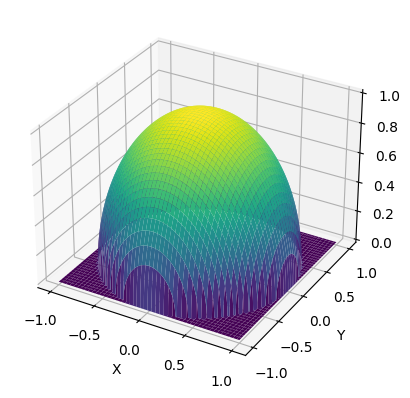

In [319]:

R = 1
n = 1000
x = np.linspace(-R, R, n + 1)
y = np.linspace(-R, R, n + 1)
x, y = np.meshgrid(x, y)

def f0(x, y):
    value =R**2 - x**2 - y**2
    value = np.where(value < 0, 0, value)
    return np.sqrt(value)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,f0(x,y),cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

b) Para cada cuadrado pequeño calculo el promedio de la funcion en los cuatro vertices
y multiplique por el area del cuadrado pequeno. Si el punto queda fuera de la esfera
asuma que el valor de la funcion $f(x, y)$ es cero.

In [320]:
def volumen_semiesfera(f, R, n):
    x = np.linspace(-R, R, n + 1)
    y = np.linspace(-R, R, n + 1)
    x, y = np.meshgrid(x, y)
    z=f0(x,y)
    V=0
    A=(x[0,1]-x[0,0])**2
    for i in range(n):
      for j in range(n):
        V+=((z[i,j]+z[i,j+1]+z[i+1,j]+z[i+1,j+1])/4)*A
    return V

volumen_real=(4/3)*(np.pi*R**3)/2
volumen_semiesfera(f0, R, n),volumen_real

(2.0943883788632625, 2.0943951023931953)

9. (Sympy) La regla de Simpson 3/8 consiste en aproximar el integrando por un polinomio
interpolador de orden 3.
a) Encontrar las funciones cardinales de dicha interpolacion e integrar para demostrar
que:
$\int_{a}^{b} f(x) ≈ \frac{3h}{8} \left[f(a) + 3f(\frac{2a + b}{3}) + 3f(\frac{a + 2b}{3}) + f(b)
\right]$
El numero de puntos de la discretizacion debe ser multiplo de tres.
Hint: Use la siguiente discretizacion $(0, h, 2h, 3h)$


In [321]:
def Lagrange(x,X,i):
  L = 1
  for j in range(len(X)):
    if i != j:
      L *= (x-X[j])/(X[i]-X[j])
  return L
def Interpolate(x,X,Y):

  Poly = 0
  for i in range(len(X)):
    Poly += Y[i]*Lagrange(x,X,i)
  return Poly

x=sp.Symbol('x')
h=sp.Symbol('h')
a=sp.Symbol('a')
b=sp.Symbol('b')
f = sp.Function('f')
X = [a, a + h, a + 2*h, a + 3*h]
Y = [f(a), f(a + h), f(a + 2*h), f(a + 3*h)]

Poly = Interpolate(x, X, Y)
Integral = sp.integrate(Poly, (x, a, a+3*h))

Integral = sp.simplify(Integral)
Integral


3*h*(f(a) + 3*f(a + h) + 3*f(a + 2*h) + f(a + 3*h))/8

b) Dado que $h = \frac{b − a}{3}$ , muestre que los puntos intermedios son $\frac{2a+b}{3}$
y
$\frac{a+2b}{3}$
respectivamente.

In [322]:
#el punto intermedio 1 es a+h
pi1=a+h
t=pi1.subs({h:(b-a)/3})
sp.together(t)

(2*a + b)/3

In [323]:
#el punto intermedio 2 es a+2h
pi2=a+2*h
t2=pi2.subs({h:(b-a)/3})
sp.together(t2)

(a + 2*b)/3

10. (Sympy) Muestre que el error asociado a la regla de Simpson 3/8 simple est´a dado por:
$E=\frac{f^{4}(ξ)}{4!} \int_{a}^{b} (x-x_{0})(x-x_{1})(x-x_{2})(x-x_{3}) =
  \frac{3}{80} h^{5} f^{4}(ξ) $

Hint: Considere la siguiente integral:
$I = \int_{0}^{3h} (x)(x-h)(x-2h)(x-3h) dx$



In [324]:
P=x*(x-h)*(x-2*h)*(x-3*h)
I=sp.integrate(P,(x,0,3*h))
xi=sp.Symbol("xi")
f = sp.Function("f")
f4=sp.diff(f(x), x, 4)
f4=f4.subs({x:xi})

E=((1/24)*I*f4)
sp.nsimplify(E)


-3*h**5*Derivative(f(xi), (xi, 4))/80

15. (Sympy) Dada la aproximacion de cuadratura gausiana:
$\int_{-1}^{1} f(x) =  \sum_{k=0}^{n} w_{k} f(x_{k})  $

donde $ w_{0}, w_{1}, ...w_{n} $son los coeficientes ponderados o pesos.

(a) Halle los ceros de los primeros 20 polinomios de Legendre.

(b) Halle los pesos de ponderaci´on para los primeros 20 polinomios de Legendre.

In [325]:
def GetLegendre(n):

  x = sp.Symbol('x')
  y = sp.Symbol('y')

  y = (x**2 - 1)**n

  p = sp.diff(y,x,n)/(2**n * np.math.factorial(n))

  return p

In [326]:
def legendre_zeros(n):
    x = sp.symbols('x')
    p = GetLegendre(n)
    critical_points = sp.Poly(p).all_roots()
    real_roots = [root.evalf() for root in critical_points]
    return real_roots

nceros=[]
for i in range(1,21):
    nceros.append(legendre_zeros(i))
nceros


<ipython-input-325-bbea6c4c43f2>:8: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  p = sp.diff(y,x,n)/(2**n * np.math.factorial(n))


[[0],
 [-0.577350269189626, 0.577350269189626],
 [-0.774596669241483, 0, 0.774596669241483],
 [-0.861136311594053,
  -0.339981043584856,
  0.339981043584856,
  0.861136311594053],
 [-0.906179845938664,
  -0.538469310105683,
  0,
  0.538469310105683,
  0.906179845938664],
 [-0.932469514203152,
  -0.661209386466264,
  -0.238619186083197,
  0.238619186083197,
  0.661209386466264,
  0.932469514203152],
 [-0.949107912342758,
  -0.741531185599394,
  -0.405845151377397,
  0,
  0.405845151377397,
  0.741531185599394,
  0.949107912342758],
 [-0.960289856497536,
  -0.796666477413627,
  -0.525532409916329,
  -0.183434642495650,
  0.183434642495650,
  0.525532409916329,
  0.796666477413627,
  0.960289856497536],
 [-0.968160239507626,
  -0.836031107326636,
  -0.613371432700590,
  -0.324253423403809,
  0,
  0.324253423403809,
  0.613371432700590,
  0.836031107326636,
  0.968160239507626],
 [-0.973906528517172,
  -0.865063366688985,
  -0.679409568299024,
  -0.433395394129247,
  -0.148874338981631,
  

In [327]:
def legendre_weights(n):
    x = sp.symbols('x')
    p = GetLegendre(n)
    dp = sp.diff(p)
    roots = legendre_zeros(n)
    weights = []
    for root in roots:
        w_k = 2 / ((1 - root**2) * (dp.subs(x, root))**2)
        weights.append(w_k)
    return weights

nweights=[]
for i in range(1,21):
    nweights.append(legendre_weights(i))
nweights

<ipython-input-325-bbea6c4c43f2>:8: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  p = sp.diff(y,x,n)/(2**n * np.math.factorial(n))


[[2],
 [1.00000000000000, 1.00000000000000],
 [0.555555555555555, 8/9, 0.555555555555555],
 [0.347854845137454, 0.652145154862546, 0.652145154862546, 0.347854845137454],
 [0.236926885056189,
  0.478628670499367,
  128/225,
  0.478628670499367,
  0.236926885056189],
 [0.171324492379170,
  0.360761573048138,
  0.467913934572691,
  0.467913934572691,
  0.360761573048138,
  0.171324492379170],
 [0.129484966168870,
  0.279705391489277,
  0.381830050505119,
  512/1225,
  0.381830050505119,
  0.279705391489277,
  0.129484966168870],
 [0.101228536290376,
  0.222381034453375,
  0.313706645877887,
  0.362683783378362,
  0.362683783378362,
  0.313706645877887,
  0.222381034453375,
  0.101228536290376],
 [0.0812743883615744,
  0.180648160694858,
  0.260610696402936,
  0.312347077040003,
  32768/99225,
  0.312347077040003,
  0.260610696402936,
  0.180648160694858,
  0.0812743883615744],
 [0.0666713443086881,
  0.149451349150581,
  0.219086362515982,
  0.269266719309997,
  0.295524224714753,
  0.295

16. Estime la siguiente integral usando el metodo de cuadratura de Gaus-Legendre:
$\int_{0}^{\infty}
\frac{1}{ x^{4} + 1} ≈ 1.110721 $

Hint: Dividir la integral para tener dos integrales con lımites [-1,1] y [0,1].

$\int_{0}^{\infty} \frac{1}{ x^{4} + 1} = \int_{0}^{1}\frac{1}{ x^{4} + 1} + \int_{1}^{\infty}
\frac{1}{ x^{4} + 1} $

para la primera, (como en la mayoria de casos), sea $x=\frac{1+t}{2}$ y $dx=\frac{1}{2}dt$

para la segunda, sea $x=\frac{1}{t}$ y $dx=-\frac{1}{t^{2}}dt$ por lo que los limites serian de 1 a 0, la integral se multiplica por -1 para que los limites sean de 0 a 1 o,  $dx=\frac{1}{t^{2}}dt$
de la misma forma cambian los ceros y los pesos

In [328]:

def caudratura_gauss_legendre(f, a, b, n):
    x_k, w_k = np.polynomial.legendre.leggauss(n)
    x_k_transformed = 0.5 * (x_k + 1) * (b - a) + a
    w_k_transformed = 0.5 * (b - a) * w_k
    integral_approx = np.dot(w_k_transformed, [f(x) for x in x_k_transformed])

    return integral_approx

def f(x):
    return 1 / (x**4 + 1)

integral_0_1 = caudratura_gauss_legendre(f, 0, 1, 10)

def f_transformed(t):
    x = 1 / t
    dx_dt = 1 / t**2
    return f(x) * dx_dt


integral_1_inf = caudratura_gauss_legendre(f_transformed, 0, 1, 10)

integral_total = integral_0_1 + integral_1_inf

integral_total

1.1107207345151289

In [329]:
f_transformed(x)

1/(x**2*(1 + x**(-4)))

17. In the black-body radiation problem the following integral appears:

$ \int_{0}^{\infty} \frac{x^3}{e^x − 1}dx = \frac{\pi ^ 4}{15}$

a) Compute this integral using the Gauss-Laguerre quadrature method for n=3 evaluation points.
 para esto convertimos la integral en

$ \int_{0}^{\infty} \frac{e^{-x} x^3}{1 − e^{-x}}dx = \frac{\pi ^ 4}{15}$

$ \int_{0}^{\infty} e^{-x} f(x)dx$

donde $ f(x)= \frac {x^3}{1 − e^{-x}}dx $

In [330]:
I_exact = np.pi**4 / 15
def f(x):
    return x**3 / (1- sp.exp(-x) )

def L_n(n):
    x=sp.Symbol('x')
    y=sp.Symbol('y')
    y=sp.exp(-x)*x**n
    p=(sp.exp(x)/(sp.factorial(n)))*sp.diff(y,x,n)
    return p.simplify()

def lag_wk(n):
    x = sp.Symbol('x')
    L_n1 = L_n(n+1)
    x_k = lag_zeros(n)
    w_k = [float(x_i / ((n + 1)**2 * L_n1.subs(x, x_i)**2)) for x_i in x_k]
    return w_k

def lag_zeros(n):
    x = sp.symbols('x')
    p = L_n(n)
    critical_points = sp.Poly(p).all_roots()
    real_roots = [root.evalf() for root in critical_points]
    return real_roots

def gauss_laguerre_quadrature(f, n):
    x_k = lag_zeros(n)
    w_k = lag_wk(n)
    integral_approx = np.dot(w_k, [f(x) for x in x_k])
    return integral_approx

I_estimated = gauss_laguerre_quadrature(f, 3)
I_estimated, I_exact



(6.48113017154003, 6.493939402266828)

b) For this estimation, plot the relative error (ϵr(n) = Iestimated(n)/Iexact) as a function
of the evaluation points, with n = [2, 3, ..., 10] [4.6].

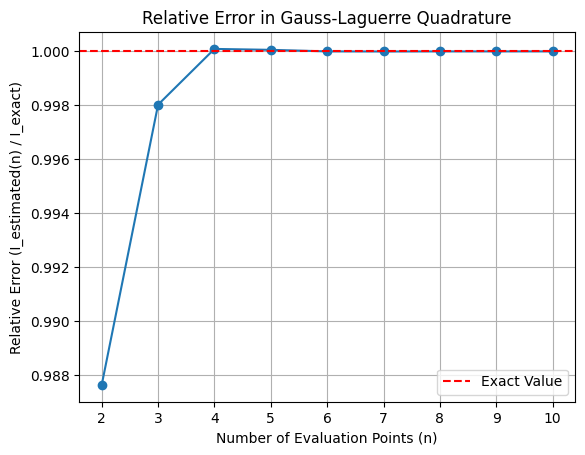

In [331]:
# Part (b) - Compute the relative error for n = [2, 3, ..., 10]
n_values = np.arange(2, 11)
errors = []

for n in n_values:
    I_estimated = gauss_laguerre_quadrature(f, n)
    relative_error = I_estimated / I_exact
    errors.append(relative_error)


plt.plot(n_values, errors, marker='o')
plt.axhline(1, color='r', linestyle='--', label='Exact Value')
plt.xlabel('Number of Evaluation Points (n)')
plt.ylabel('Relative Error (I_estimated(n) / I_exact)')
plt.title('Relative Error in Gauss-Laguerre Quadrature')
plt.legend()
plt.grid(True)
plt.show()

21. Una funcion se puede representar como una combinacion lineal de $ N + 1$ polinomios de
Legendre $ P_{n}(x), n = 0, 1, ..., N$.

$
f(x) = ∑_{n=0}^{N}c_{n}P_{n}(x) $ (1)

El problema computacional requiere la estimacion de los coeficientes de la expansion. Sea
la funcion signo:
$sgn(x) = \begin{cases}
-1 &   x<{0} \\
0 &  x=0 \\
+1 & x>0
\end{cases}
$

(a) (Theoretical) Usando las relaciones de ortogonalidad de los polinomios de Legendre,
muestre que los coeficientes estan dados por:

$c_{n} =\frac{2n + 1}{2} \int_{-1}^{1} f(x)P_{n}(x)dx, n = 0, 1, ..., N $

como $\int_{-1}^{1} P_{n}(x)P_{m}(x)dx  = \begin{cases}
0 &   n \neq m \\
\frac{2}{2n+1} &  n=m
\end{cases}
$ (2)

es decir si multiplicamos (1) por $P_{n}$

$
P_{n}f(x) = ∑_{n=0}^{N}c_{m}P_{n}P_{m}(x) $

integramos ambos lados de -1 a 1

$\int_{-1}^{1} P_{n}f(x) =\int_{-1}^{1} ∑_{n=0}^{N}c_{m}P_{n}P_{m}(x) $

por propiedades de la suma e integral

$\int_{-1}^{1} P_{n}f(x) = ∑_{n=0}^{N}c_{m} \int_{-1}^{1}P_{n}P_{m}(x) $

por (2) tenemos que el unico termino que sobrevive es

$\int_{-1}^{1} P_{n}f(x) =c_{n} \frac{2}{2n+1} $

lo que nos da lo que queriamos

$c_{n} =\frac{2n + 1}{2} \int_{-1}^{1} f(x)P_{n}(x)dx, n = 0, 1, ..., N $

(b) Implemente la funcion $sgn(x)$.

In [332]:
@np.vectorize
def sgn(x):
    if x < 0:
        return -1
    elif x == 0:
        return 0
    else:
        return 1

(c) Vectorice y dibuje la funcion

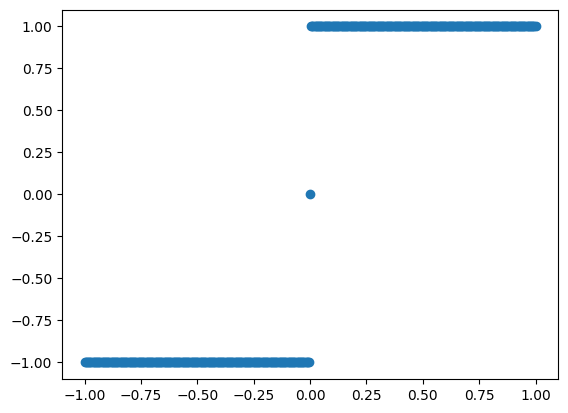

In [333]:
x_vals = np.linspace(-1, 1, 401)
y=[sgn(i) for i in x_vals]
plt.scatter(x_vals,y)
plt.show()

(d) Defina los puntos y los pesos de Gauss-Legendre al grado n = 15.

In [334]:
x_k=legendre_zeros(15)
w_k=legendre_weights(15)

<ipython-input-325-bbea6c4c43f2>:8: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  p = sp.diff(y,x,n)/(2**n * np.math.factorial(n))


(e) Cree y guarde los polinomios de Legendre al grado N = 20.

In [335]:
npoly=[]
for i in range(21):
    npoly.append(GetLegendre(i))
npoly

<ipython-input-325-bbea6c4c43f2>:8: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  p = sp.diff(y,x,n)/(2**n * np.math.factorial(n))


[1,
 x,
 (3*x**2 - 1)/2,
 x*(5*x**2 - 3)/2,
 (8*x**4 + 24*x**2*(x**2 - 1) + 3*(x**2 - 1)**2)/8,
 x*(8*x**4 + 40*x**2*(x**2 - 1) + 15*(x**2 - 1)**2)/8,
 (16*x**6 + 120*x**4*(x**2 - 1) + 90*x**2*(x**2 - 1)**2 + 5*(x**2 - 1)**3)/16,
 x*(16*x**6 + 168*x**4*(x**2 - 1) + 210*x**2*(x**2 - 1)**2 + 35*(x**2 - 1)**3)/16,
 (128*x**8 + 1792*x**6*(x**2 - 1) + 3360*x**4*(x**2 - 1)**2 + 1120*x**2*(x**2 - 1)**3 + 35*(x**2 - 1)**4)/128,
 x*(128*x**8 + 2304*x**6*(x**2 - 1) + 6048*x**4*(x**2 - 1)**2 + 3360*x**2*(x**2 - 1)**3 + 315*(x**2 - 1)**4)/128,
 (256*x**10 + 5760*x**8*(x**2 - 1) + 20160*x**6*(x**2 - 1)**2 + 16800*x**4*(x**2 - 1)**3 + 3150*x**2*(x**2 - 1)**4 + 63*(x**2 - 1)**5)/256,
 x*(256*x**10 + 7040*x**8*(x**2 - 1) + 31680*x**6*(x**2 - 1)**2 + 36960*x**4*(x**2 - 1)**3 + 11550*x**2*(x**2 - 1)**4 + 693*(x**2 - 1)**5)/256,
 (1024*x**12 + 33792*x**10*(x**2 - 1) + 190080*x**8*(x**2 - 1)**2 + 295680*x**6*(x**2 - 1)**3 + 138600*x**4*(x**2 - 1)**4 + 16632*x**2*(x**2 - 1)**5 + 231*(x**2 - 1)**6)/1024,
 x

(f) Cree una funci´on que calcule los N + 1 coeficientes en un array de numpy.


In [336]:
def calcular_coeficientes(f, N, puntos, pesos, npoly):
    coeficientes = np.zeros(N + 1)
    for n in range(N + 1):
        integral = 0
        Pn = npoly[n]
        for i in range(len(puntos)):
            fx = f(puntos[i])
            Pn_val = Pn.subs(sp.Symbol('x'), puntos[i])
            integral += pesos[i] * fx * Pn_val

        coeficientes[n] = (2 * n + 1) / 2 * integral

    return coeficientes
N=20
coeficientes = calcular_coeficientes(sgn, N,x_k,w_k,npoly)
coeficientes

array([-7.45931095e-17,  1.48971231e+00,  1.73472348e-17, -8.38742583e-01,
       -3.12250226e-17,  6.15369232e-01,  0.00000000e+00, -4.68994560e-01,
       -2.94902991e-17,  3.48540946e-01,  1.82145965e-17, -2.36219080e-01,
       -4.33680869e-17,  1.22517145e-01,  1.88651178e-17, -1.19791013e-14,
       -2.86229374e-17, -1.39529963e-01, -3.20923843e-17,  3.07786739e-01,
        3.55618313e-17])

(g) Calcule la combinaci´on lineal (Ecuaci´on (4.195)) para cada valor del dominio que
uso para dibujar la funci´on original.

In [337]:
def combinacion_lineal_legendre2(x_v, coeficientes, npoly):
    N = len(coeficientes) - 1
    x = sp.Symbol('x')
    Pn_matrix = np.array([[npoly[n].subs(x, val) for val in x_v] for n in range(N + 1)], dtype=float)
    f_aprox = np.dot(coeficientes, Pn_matrix)

    return f_aprox


(h) Dibuje la representaci´on en la base de Legendre para obtener:


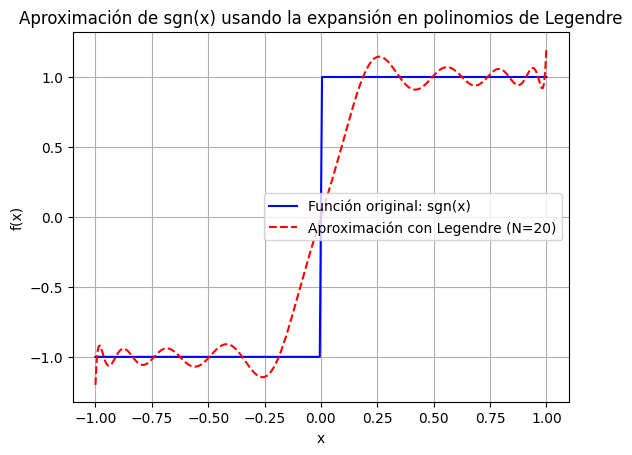

In [338]:


f_aprox = combinacion_lineal_legendre2(x_vals, coeficientes3,npoly)
plt.plot(x_vals, sgn(x_vals), label='Función original: sgn(x)', color='blue')
plt.plot(x_vals, f_aprox, label=f'Aproximación con Legendre (N={N})', color='red', linestyle='--')
plt.title('Aproximación de sgn(x) usando la expansión en polinomios de Legendre')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()